## Data visualization and processing

first import all required libraries and load data into pandas data frame


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import brewer2mpl
from keras.utils.np_utils import to_categorical


set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors


%matplotlib inline

df = pd.read_csv('data/fer2013/fer2013.csv')
emotions={0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

Using TensorFlow backend.


find number fo training samples,number of test samples,understand data features

In [2]:
print "\nFERC-2013 DATASET"
print "\nData columns",df.columns.values

print "\nUnique Usage values",df.Usage.unique()

print "\nVarious usage size:\n"

for usage in df.Usage.unique():
    print "---",usage,len(df[df.Usage==usage].index)
    
print "\nMerging private and public dataset"

df.ix[df.Usage=="PublicTest","Usage"]="Testing"
df.ix[df.Usage=="PrivateTest","Usage"]="Testing"

print "\nNew dataset usage size:\n"

for usage in df.Usage.unique():
    print "---",usage,len(df[df.Usage==usage].index)




FERC-2013 DATASET

Data columns ['emotion' 'pixels' 'Usage']

Unique Usage values ['Training' 'PublicTest' 'PrivateTest']

Various usage size:

--- Training 28709
--- PublicTest 3589
--- PrivateTest 3589

Merging private and public dataset

New dataset usage size:

--- Training 28709
--- Testing 7178


## Distribution of various emotions in training and test dataset


In [3]:
def plot_bar_graph( y ,xlabels):
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(1,6,6)
    ax.bar(np.arange(0,len(y)), y, color=set3,alpha=0.5)
    ax.set_xticklabels(xlabels, rotation=90, fontsize=10)
    
    ax.set_xticks(np.arange(0.5,len(y)+0.5,1))
    
    for i, v in enumerate(y):
        ax.text(i+0.25, v, str(v), color='blue', fontweight='bold',rotation=90,)
    plt.tight_layout()
    plt.show()

Training data 


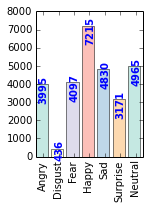

Testing data 


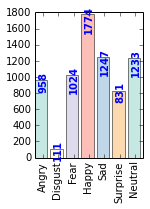

In [4]:
training_dataset=df[df.Usage=="Training"]
testing_dataset=df[df.Usage=="Testing"]

print "Training data "

sizes=[]
for i in emotions.keys():
    sizes.append(len(training_dataset[training_dataset.emotion==i].index))
    
plot_bar_graph(sizes,emotions.values())

print "Testing data "

sizes=[]
for i in emotions.keys():
    sizes.append(len(testing_dataset[testing_dataset.emotion==i].index))
    
plot_bar_graph(sizes,emotions.values())

As we observed from the size of  samples for various emotions,number of samples for disgusting class is very less.Hence if we keep this label for training then our model won't be able to detect this emotion accurately. So We will merge Disgust and Angry samples to one single sample Angry


/home/swaraj/.local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Modified Training data 


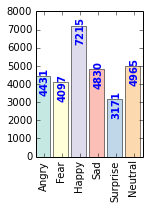

Modified Testing data 


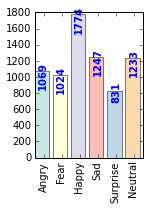

In [5]:
training_dataset.loc[training_dataset.emotion==0,"emotion"]=1
testing_dataset.loc[testing_dataset.emotion==0,"emotion"]=1


print "Modified Training data "
emotions[1]=emotions[0]
del emotions[0]

sizes=[]
for i in emotions.keys():
    sizes.append(len(training_dataset[training_dataset.emotion==i].index))
    
plot_bar_graph(sizes,emotions.values())

print "Modified Testing data "

sizes=[]
for i in emotions.keys():
    sizes.append(len(testing_dataset[testing_dataset.emotion==i].index))
    
plot_bar_graph(sizes,emotions.values())

## Save  data for future use

In [ ]:
def reconstruct(pix_str, size=(48,48)):
    pix_arr = np.asarray(pix_str.split()).astype(int)
    return pix_arr.reshape(size)


train_rows = random.sample(list(training_dataset.index), int(len(training_dataset)))
train_data = training_dataset.ix[train_rows]
train_data['pixels'] = train_data.pixels.apply(lambda x: reconstruct(x))

x_train = np.array([mat for mat in train_data.pixels]) # (n_samples, img_width, img_height)
X_train = x_train.reshape(-1, 48,48,1)
y_train = np.array(train_data.emotion.values)
y_train = to_categorical(y_train-1)

test_rows = random.sample(list(testing_dataset.index), int(len(testing_dataset)))
test_data = testing_dataset.ix[test_rows]
test_data['pixels'] = test_data.pixels.apply(lambda x: reconstruct(x))

x_test = np.array([mat for mat in test_data.pixels]) # (n_samples, img_width, img_height)
X_test = x_test.reshape(-1, 48,48,1)
y_test = np.array(test_data.emotion.values)
y_test = to_categorical(y_test-1)

np.save("data/X_train", X_train)
np.save("data/X_test", X_test)
np.save("data/y_train", y_train)
np.save("data/y_test", y_test)
    
